In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians


We explore the thermalization properties of the ACL model. To do this we need to identify first the parameters that lead to thermalization like behavior. The goal here is to reproduce the results of "equi, themal in ACL " paper.

To start we find parameters with good properties. 

From the paper, we note that the system has to start in a coherent state and the environment in an energy eigenstate. 
HI = qxHie, q the SHO position op, and Hie a rd matrix EI.Hr (elem btw -0.5 and 0.5). Hs the truncated SHO. Ne=600, Ns=30. He=EexHr

Going from the form of the model,
$$ = [{\color{ForestGreen}E_s} \otimes diag(i)\otimes id(d_2) + {\color{ForestGreen}E_{s2}} \otimes id(d_1)\otimes id(d_2) ] + [{\color{ForestGreen}(E_{int\_ s}} \otimes offdiag(\sqrt{i}) + {\color{ForestGreen}E_{int\_ s2}} \otimes diag(i)) \otimes ({\color{ForestGreen}E_{int\_ e}} \otimes rd(d_2) + {\color{ForestGreen}E_{int\_ e2}} \otimes id(d_2))] + [id(d_1) \otimes ({\color{ForestGreen}E_e} \otimes H_{e\_ self} + {\color{ForestGreen}E_{e2}} \otimes id(d_2))]$$

We need to select d1 and d2 as 30 and 600. to make the matrices btw +-0.5, we keep a look at plot_hamiltonians. all constant terms as 0 means 

In [3]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.25; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 100; ind_nb = 100;log=1

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)


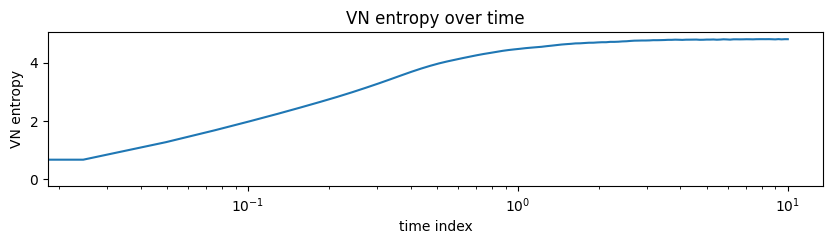

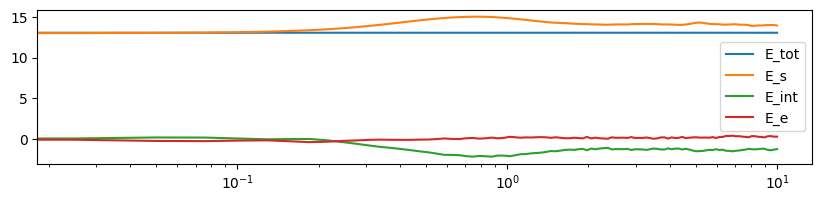

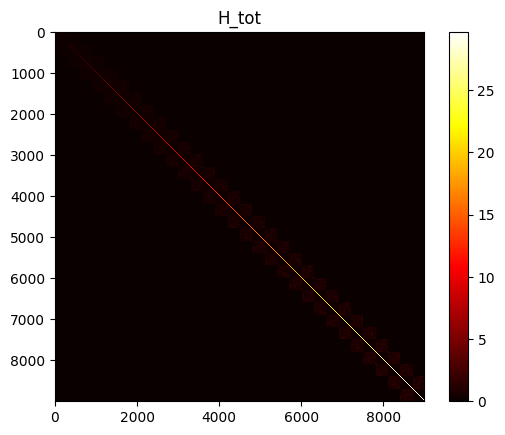

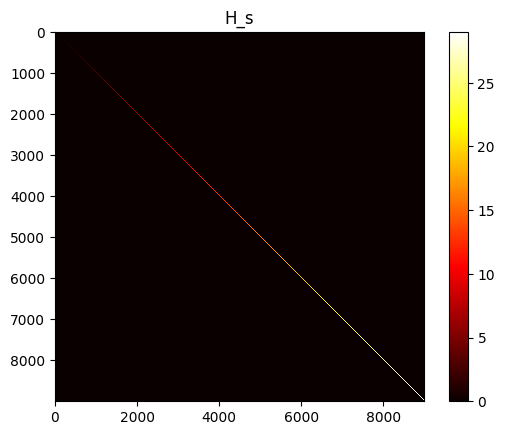

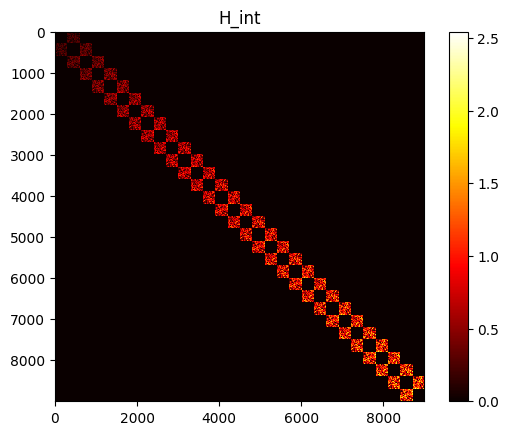

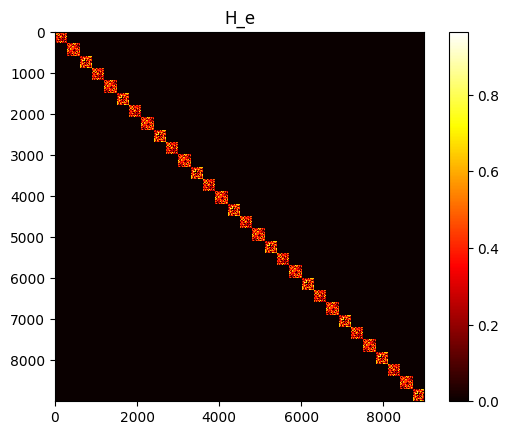

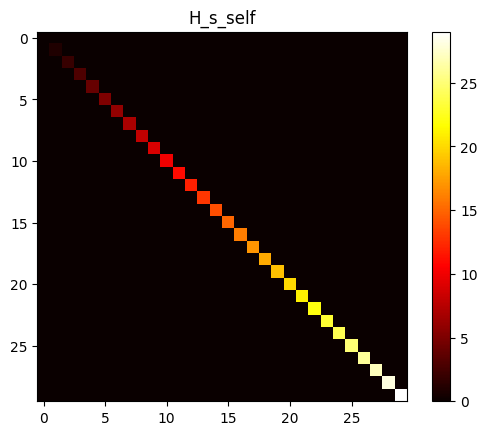

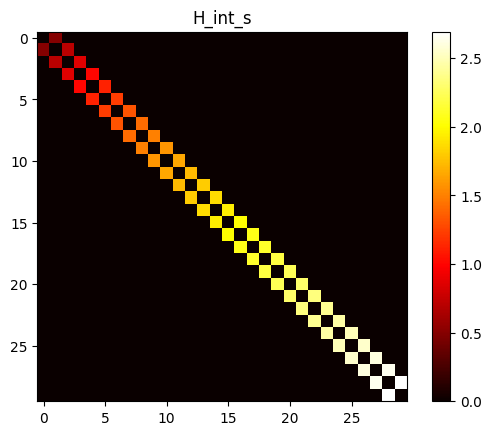

In [ ]:
plot_VN(result,info[15],1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

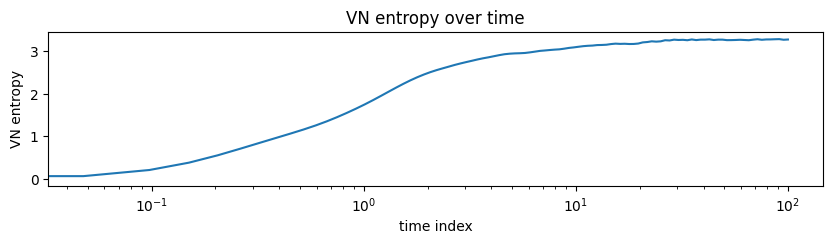

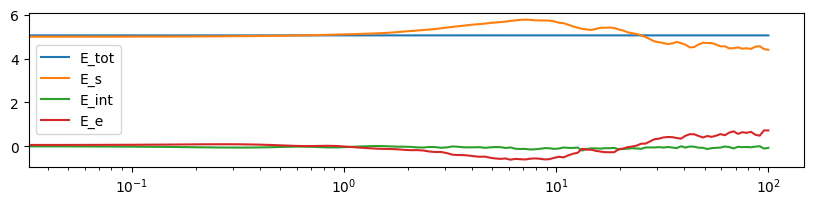

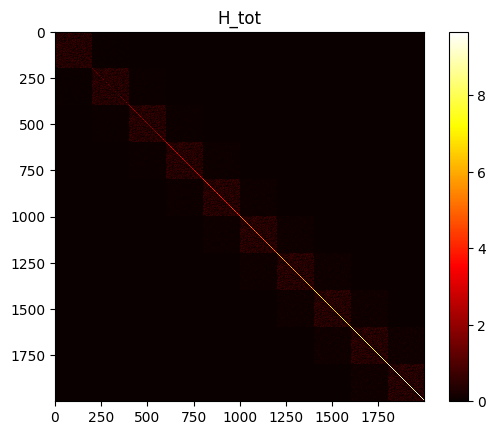

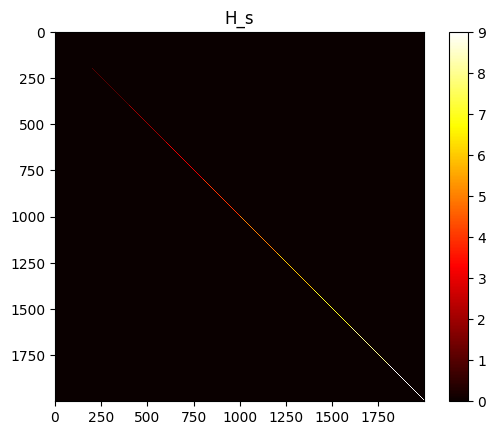

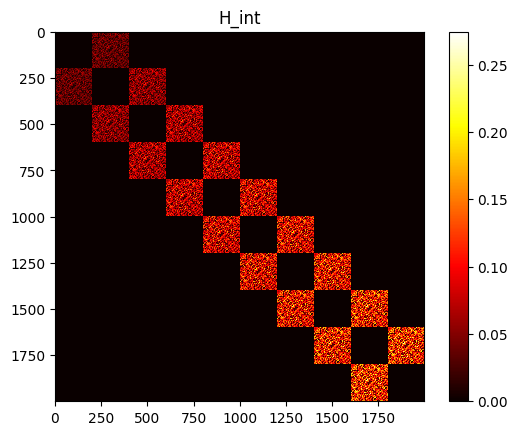

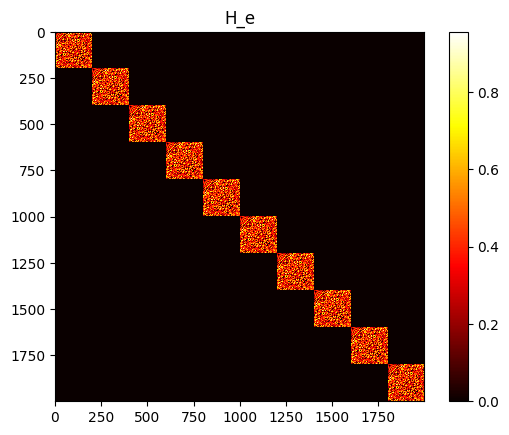

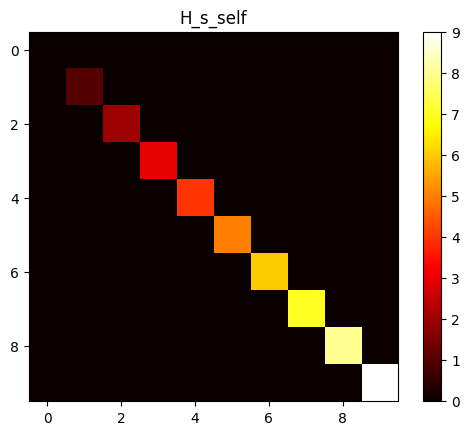

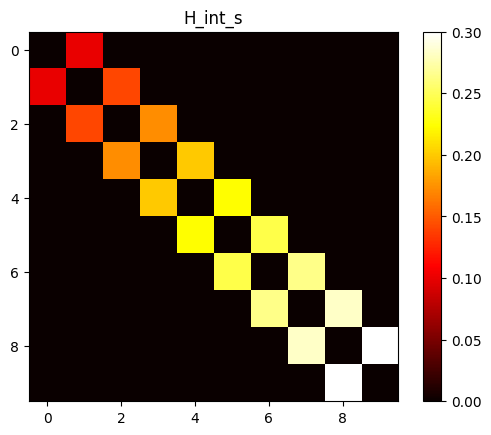

In [ ]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0.1; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=0.7; E_e2=0;w=[0,0,0,0,0,1,0,0,0,0];envi=[0]; tmax= 500; ind_nb = 500;log=1

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)
plot_VN(result,info[15],1)
plt.show()
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.figure(figsize=(10, 2))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.show()

plot_hamiltonians(H_list)

the following one reproduces collapse with our simpler initial model.

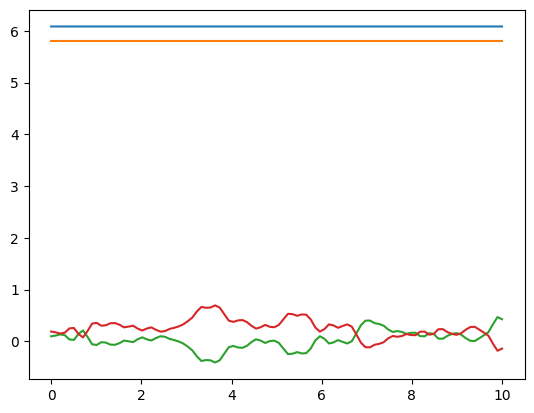

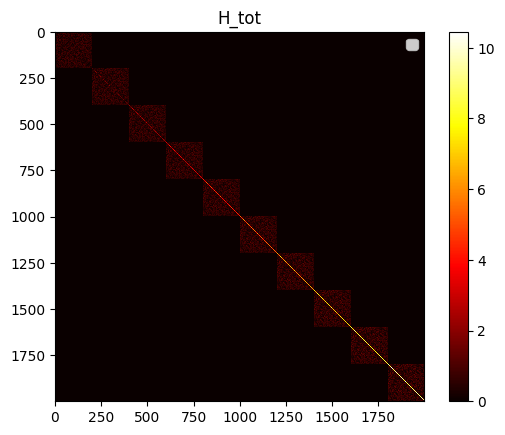

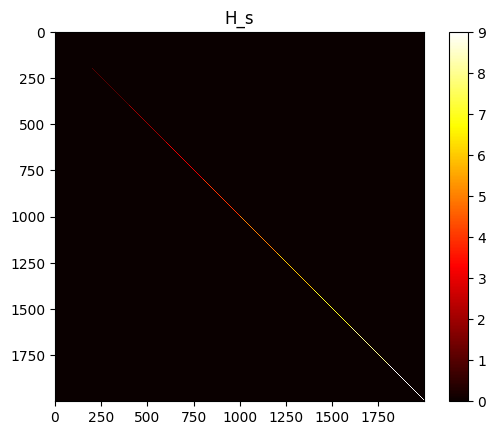

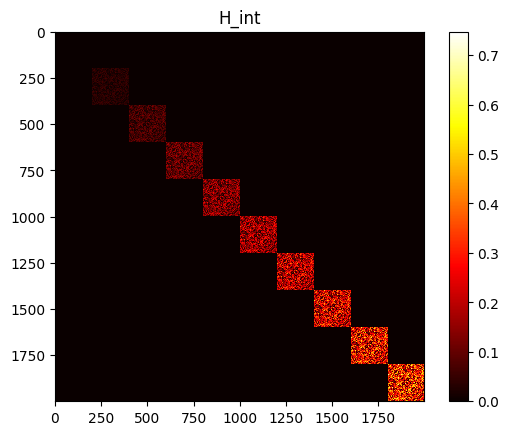

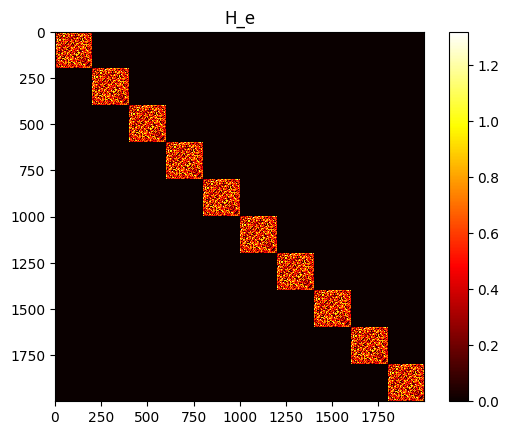

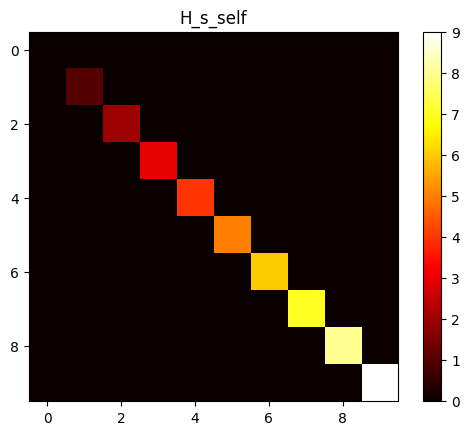

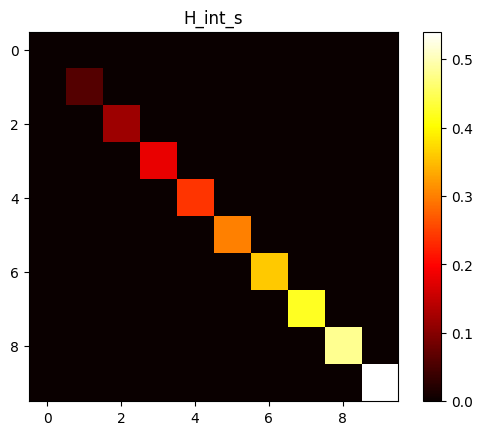

In [6]:
d1=10;d2=200;E_s=1; E_s2=0; E_int_s=0; E_int_e=1;E_int_s2=0.06;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0];envi=[0]; tmax= 10; ind_nb = 100;log=0

# Running the simulation and running the core functions

result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log)
eigen = eig(H_list)
[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, info)
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.show()
plt.legend(["E_tot","E_s","E_int","E_e"])
plot_hamiltonians(H_list)

So,to test thermalization I need to start my system in a coherent state + an enery eigenstate of the environment hamiltonian.
I may need tomodify the hamiltonians as well. because H_s = SHO, and qs = hamiltonian with position eigenstates.
Thisis not interesting yet because the system has no self interaction.